# Importando os dados

Explorando uma base de dados da área de biologia e da biotecnologia para identificar novas drogas mais funcionais com baixa contraposto.

O objetivo é identificar um alvo proteico associado a uma doença e desenvolver uma molécula que possa modular essa proteína auxiliando a desenvolver um algoritmo para prever o MoA de um composto (atividade biológica de uma determinada molécula), dada sua assinatura celular, ajudando os cientistas a avançar no processo de descoberta de medicamentos.

Em farmacologia, o termo MOA - Mechanism of Action (Mecanismo de Ação) - refere-se à interação bioquímica específica através da qual uma substância medicamentosa produz seu efeito farmacológico


### Desenvolvimento do Projeto

In [1]:
# importing pandas as pd 
import pandas as pd

# importing numpy as np 
import numpy as np

# importing seaborn as sns
import seaborn as sns

# importing pyplot
from matplotlib import pyplot as plt

# importing train_test_split
from sklearn.model_selection import train_test_split

# importing LogisticRegression model
from sklearn.linear_model import LogisticRegression


### Análise exploratória

In [2]:
# Banco de dados
# Do github
# data_file = 'https://github.com/johnnyhorita/awari-datascience/blob/main/12-Projeto-Final/dados/dados_combinados.zip?raw=true'
data_file = 'dados\dados_combinados.zip'

# Importando o banco de dados para o Dataframe
dfc = pd.read_csv(data_file, compression = 'zip')

In [3]:
# Informações do dataframe
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 883 entries, id to tratamento_com_controle
dtypes: bool(5), float64(872), int64(2), object(4)
memory usage: 159.6+ MB


In [4]:
# Amostra de variaveis
dfc.head(10)

,id,tratamento,tempo,dose,composto,g_0,g_1,g_2,g_3,g_4,...,c_96,c_97,c_98,c_99,n_moa,is_Activated,24,48,72,tratamento_com_controle
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,-0.3981,0.2139,0.3801,0.4176,1,True,True,False,False,False
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.1522,0.1241,0.6077,0.7371,0,False,False,False,True,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.6417,-0.2187,-1.4080,0.6931,3,True,False,True,False,False
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-1.6210,-0.8784,-0.3876,-0.8154,0,False,False,True,False,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.1094,0.2885,-0.3786,0.7125,1,True,False,False,True,False
5,id_001762a82,com_droga,24,D1,e06749542,-0.6111,0.2941,-0.9901,0.2277,1.2810,...,1.2120,0.3765,0.7848,1.3990,1,True,True,False,False,False
6,id_001bd861f,com_droga,24,D2,746ca1f5a,2.0440,1.7000,-1.5390,5.9440,-2.1670,...,2.4670,0.0357,0.1351,-0.3179,0,False,True,False,False,False
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,...,0.6633,0.4562,-0.9622,0.0260,1,True,False,True,False,False
8,id_00224bf20,com_droga,48,D1,952b76dfc,-0.3014,0.5545,-0.2576,-0.1390,-0.6487,...,-0.1167,-0.1241,-0.6420,0.5543,0,False,False,True,False,False
9,id_0023f063e,com_droga,48,D2,de7583071,-0.0630,0.2564,-0.5279,-0.2541,-0.0182,...,-0.8745,-0.2716,0.0189,-2.0000,1,True,False,True,False,False


In [5]:
# Quantidade de atributos e variáveis
dfc.shape

(23814, 883)

### Preparação e limpeza dos dados

In [6]:
# Analisa valores nulos
dfc.isnull().sum()

id                         0
tratamento                 0
tempo                      0
dose                       0
composto                   0
                          ..
is_Activated               0
24                         0
48                         0
72                         0
tratamento_com_controle    0
Length: 883, dtype: int64

### Seleção de atributos

In [7]:
# Correlação entre as variáveis
dfc.corr()

,tempo,g_0,g_1,g_2,g_3,g_4,g_5,g_6,g_7,g_8,...,c_96,c_97,c_98,c_99,n_moa,is_Activated,24,48,72,tratamento_com_controle
tempo,1.000000,0.007610,0.043335,-0.162238,-0.031226,0.027241,-0.081324,-0.030058,0.003499,-0.024291,...,-0.067116,-0.067969,-0.088916,-0.075736,0.000830,0.000199,-0.861703,-0.000756,0.861900,0.000857
g_0,0.007610,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,...,-0.646784,-0.622840,-0.640484,-0.609238,0.259544,0.133242,-0.017407,0.021376,-0.004283,-0.072139
g_1,0.043335,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,...,-0.022127,-0.008487,-0.002824,-0.002308,0.032298,0.030972,-0.040574,0.006337,0.034121,-0.066868
g_2,-0.162238,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,...,-0.182540,-0.178812,-0.170152,-0.172124,0.070537,0.030371,0.147742,-0.015527,-0.131898,-0.053437
g_3,-0.031226,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,...,-0.083846,-0.049951,-0.079855,-0.037579,0.094053,0.075377,0.034461,-0.014863,-0.019365,0.002551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
is_Activated,0.000199,0.133242,0.030972,0.030371,0.075377,0.084482,-0.037105,0.018192,-0.093888,-0.142016,...,-0.136478,-0.119264,-0.151677,-0.120524,0.838153,1.000000,0.000557,-0.001435,0.000899,-0.362115
24,-0.861703,-0.017407,-0.040574,0.147742,0.034461,-0.031495,0.064817,0.024855,-0.010530,0.030745,...,0.055791,0.061087,0.081420,0.065655,-0.000297,0.000557,1.000000,-0.506761,-0.485404,-0.000997
48,-0.000756,0.021376,0.006337,-0.015527,-0.014863,0.015788,0.010427,0.002084,0.014808,-0.019321,...,0.004077,-0.004911,-0.009394,-0.000718,-0.000825,-0.001435,-0.506761,1.000000,-0.507730,0.000510
72,0.861900,-0.004283,0.034121,-0.131898,-0.019365,0.015463,-0.075349,-0.026952,-0.004494,-0.011130,...,-0.059889,-0.056066,-0.071839,-0.064884,0.001133,0.000899,-0.485404,-0.507730,1.000000,0.000480


In [8]:
dfc.describe().T

,count,mean,std,min,25%,50%,75%,max
tempo,23814.0,48.020156,19.402807,24.000,24.000000,48.00000,72.000000,72.000
g_0,23814.0,0.248366,1.393399,-5.513,-0.473075,-0.00885,0.525700,10.000
g_1,23814.0,-0.095684,0.812363,-5.737,-0.562200,-0.04660,0.403075,5.039
g_2,23814.0,0.152253,1.035731,-9.104,-0.437750,0.07520,0.663925,8.257
g_3,23814.0,0.081971,0.950012,-5.998,-0.429575,0.00805,0.463400,10.000
...,...,...,...,...,...,...,...,...
c_96,23814.0,-0.463485,2.059725,-10.000,-0.552575,-0.00125,0.465225,3.505
c_97,23814.0,-0.378241,1.703615,-10.000,-0.561000,-0.00680,0.446400,2.924
c_98,23814.0,-0.470252,1.834828,-10.000,-0.592600,0.01400,0.461275,3.111
c_99,23814.0,-0.301505,1.407918,-10.000,-0.562900,-0.01950,0.438650,3.805


In [9]:
#df['Exited'].plot.bar()
dfc['is_Activated'].value_counts()

True     14447
False     9367
Name: is_Activated, dtype: int64

In [10]:
dfc['is_Activated'].value_counts(normalize=True)

True     0.60666
False    0.39334
Name: is_Activated, dtype: float64

### Construção do modelo

In [11]:
X = dfc.select_dtypes('float64')
y = dfc['is_Activated']

In [12]:
y.value_counts()

True     14447
False     9367
Name: is_Activated, dtype: int64

In [13]:
X.head

<bound method NDFrame.head of           g_0     g_1     g_2     g_3     g_4     g_5     g_6     g_7     g_8  \
0      1.0620  0.5577 -0.2479 -0.6208 -0.1944 -1.0120 -1.0220 -0.0326  0.5548   
1      0.0743  0.4087  0.2991  0.0604  1.0190  0.5207  0.2341  0.3372 -0.4047   
2      0.6280  0.5817  1.5540 -0.0764 -0.0323  1.2390  0.1715  0.2155  0.0065   
3     -0.5138 -0.2491 -0.2656  0.5288  4.0620 -0.8095 -1.9590  0.1792 -0.1321   
4     -0.3254 -0.4009  0.9700  0.6919  1.4180 -0.8244 -0.2800 -0.1498 -0.8789   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
23809  0.1394 -0.0636 -0.1112 -0.5080 -0.4713  0.7201  0.5773  0.3055 -0.4726   
23810 -1.3260  0.3478 -0.3743  0.9905 -0.7178  0.6621 -0.2252 -0.5565  0.5112   
23811  0.3942  0.3756  0.3109 -0.7389  0.5505 -0.0159 -0.2541  0.1745 -0.0340   
23812  0.6660  0.2324  0.4392  0.2044  0.8531 -0.0343  0.0323  0.0463  0.4299   
23813 -0.8598  1.0240 -0.1361  0.7952 -0.3611 -3.6750 -1.2420  0.9146  3.0790  

In [14]:
y.head()

0     True
1    False
2     True
3    False
4     True
Name: is_Activated, dtype: bool

In [15]:
# Número aleatório
rnds = 42

In [16]:
#Separação da parte de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = rnds, stratify=dfc['is_Activated'])

In [17]:
# Quantidade da massa de treino
len(X_train)

19051

In [18]:
# Quantidade da massa de teste
len(X_test)

4763

### Avaliação do modelo

In [19]:
# importing LinearRegression model
from sklearn.linear_model import LinearRegression 

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.6353138778081041

In [20]:
# importing DummyClassifier model
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dc = DummyClassifier('most_frequent')
dc.fit(X_train, y_train)
dc_preds = dc.predict(X_test)
accuracy_score(y_test, dc_preds)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass strategy=most_frequent as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


0.6067604450976275

In [21]:
# importing RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_preds = rfc.predict(X_test)
rfc.score(X_test, y_test)

0.6535796766743649

In [22]:
 # o classificador "overfitou" - sobreajustou
rfc.score(X_train, y_train)

1.0

In [23]:
# importing DecisionTreeClassifier model
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth = 3)
dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

0.6235565819861432

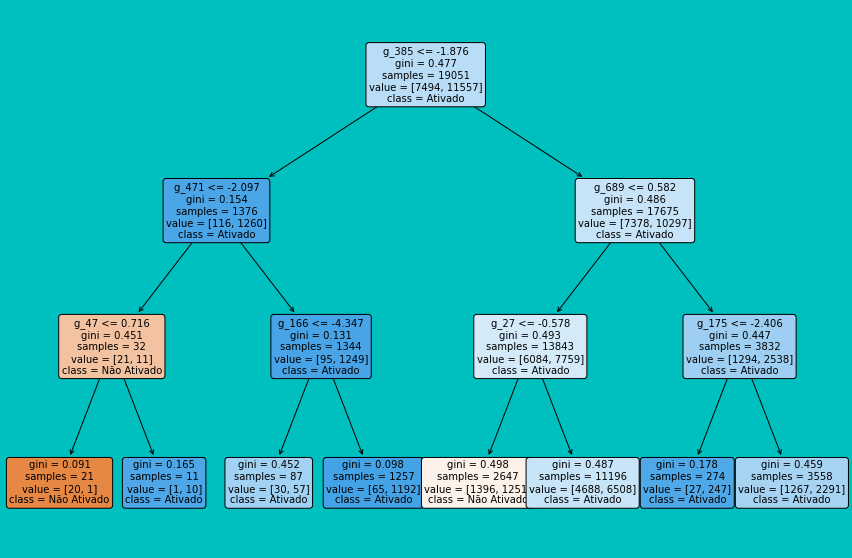

In [24]:
from sklearn import tree

fig, ax = plt.subplots(figsize=(15, 10), facecolor='c')
tree.plot_tree(dtc,
               ax=ax,
               fontsize=10,
               rounded=True,
               filled=True,
               feature_names=X_train.columns,
               class_names=['Não Ativado', 'Ativado'])

plt.show()

In [25]:
test=[]
train=[]
for i in range(1,15):
    dtc = DecisionTreeClassifier(max_depth = i)
    dtc.fit(X_train, y_train)
    test.append(dtc.score(X_test, y_test))
    train.append(dtc.score(X_train, y_train))

In [26]:
test

[0.6067604450976275,
 0.6061305899643082,
 0.6235565819861432,
 0.6254461473861012,
 0.6141087549863531,
 0.623976485408356,
 0.6176779340751627,
 0.6113793827419693,
 0.612639093008608,
 0.612639093008608,
 0.6159983203863112,
 0.6138988032752467,
 0.6111694310308629,
 0.6094898173420114]

In [27]:
train

[0.6066348223190384,
 0.6071597291480763,
 0.615243294315259,
 0.6214371948979056,
 0.6327226917222193,
 0.6424859587423233,
 0.6551887040050391,
 0.6723006666316729,
 0.6913547845257467,
 0.7141357409059892,
 0.7384914177733453,
 0.7673612933704268,
 0.7967035851136424,
 0.8265707836858958]

<AxesSubplot:>

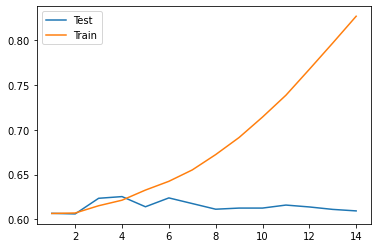

In [28]:
sns.lineplot(x=range(1,15), y = test, label='Test')
sns.lineplot(x=range(1,15), y = train, label='Train')

In [29]:
# importing SVC model
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
svc_preds = svc.predict(X_test)
svc.score(X_test, y_test)

0.6689061515851354

In [30]:
svc.score(X_train, y_train)

0.7359718649939636

In [31]:

from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

classificadores = [dc, rfc, svc]
y_preds = [dc_preds, rfc_preds, svc_preds]

In [32]:
for classificador, y_pred in zip(classificadores, y_preds):
  print(classificador.__class__.__name__)
  print(classification_report(y_test, y_pred))
  print(f'Score de área embaixo da curva: {roc_auc_score(y_test, y_pred):.3f} \n')
  print('Matrix de confusão:\n', confusion_matrix(y_test, y_pred, labels=[0, 1]))
  print('-'*80)

DummyClassifier
              precision    recall  f1-score   support

       False       0.00      0.00      0.00      1873
        True       0.61      1.00      0.76      2890

    accuracy                           0.61      4763
   macro avg       0.30      0.50      0.38      4763
weighted avg       0.37      0.61      0.46      4763

Score de área embaixo da curva: 0.500 

Matrix de confusão:
 [[   0 1873]
 [   0 2890]]
--------------------------------------------------------------------------------
RandomForestClassifier
              precision    recall  f1-score   support

       False       0.64      0.27      0.38      1873
        True       0.66      0.90      0.76      2890

    accuracy                           0.65      4763
   macro avg       0.65      0.59      0.57      4763
weighted avg       0.65      0.65      0.61      4763

Score de área embaixo da curva: 0.586 

Matrix de confusão:
 [[ 509 1364]
 [ 286 2604]]
--------------------------------------------------

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


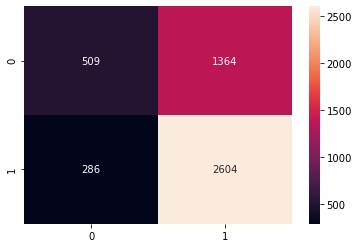

In [33]:
# plotando a matriz com seaborn
sns.heatmap(confusion_matrix(y_test, rfc_preds), annot=True, fmt='g');

### Otimização do modelo

In [34]:

from sklearn.model_selection import GridSearchCV

classificadores = [dc, rfc, svc]
metricas = ['roc_auc', 'f1', 'accuracy']

dc_params = {'strategy': ['stratified', 'most_frequent'],
             'random_state': [rnds]}

rfc_params = {'max_depth': [5, 10, 20, 30],
              'n_estimators': [50, 100, 200, 300],
              'random_state' : [rnds]}

svc_params = {'kernel': ['rbf'], #, 'linear'],
              'C': [1.0], #, 0.5, 0.001],
              'random_state' : [rnds]}

lista_parametros = [dc_params, rfc_params, svc_params]

In [35]:
for classificador, parametros in zip(classificadores, lista_parametros):
  print(classificador.__class__.__name__)
  gs = GridSearchCV(classificador, parametros, scoring=metricas, 
                    refit='roc_auc', 
                    verbose=3)
  gs.fit(X_train, y_train)

DummyClassifier
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END random_state=42, strategy=stratified; accuracy: (test=0.528) f1: (test=0.609) roc_auc: (test=0.507) total time=   0.0s
[CV 2/5] END random_state=42, strategy=stratified; accuracy: (test=0.512) f1: (test=0.596) roc_auc: (test=0.490) total time=   0.0s
[CV 3/5] END random_state=42, strategy=stratified; accuracy: (test=0.521) f1: (test=0.603) roc_auc: (test=0.499) total time=   0.0s
[CV 4/5] END random_state=42, strategy=stratified; accuracy: (test=0.519) f1: (test=0.601) roc_auc: (test=0.497) total time=   0.0s
[CV 5/5] END random_state=42, strategy=stratified; accuracy: (test=0.533) f1: (test=0.613) roc_auc: (test=0.512) total time=   0.0s
[CV 1/5] END random_state=42, strategy=most_frequent; accuracy: (test=0.607) f1: (test=0.755) roc_auc: (test=0.500) total time=   0.0s
[CV 2/5] END random_state=42, strategy=most_frequent; accuracy: (test=0.607) f1: (test=0.755) roc_auc: (test=0.500) total time=  

[CV 4/5] END max_depth=20, n_estimators=100, random_state=42; accuracy: (test=0.656) f1: (test=0.769) roc_auc: (test=0.672) total time=  34.5s
[CV 5/5] END max_depth=20, n_estimators=100, random_state=42; accuracy: (test=0.640) f1: (test=0.756) roc_auc: (test=0.659) total time=  34.4s
[CV 1/5] END max_depth=20, n_estimators=200, random_state=42; accuracy: (test=0.652) f1: (test=0.766) roc_auc: (test=0.655) total time= 1.2min
[CV 2/5] END max_depth=20, n_estimators=200, random_state=42; accuracy: (test=0.651) f1: (test=0.765) roc_auc: (test=0.646) total time= 1.1min
[CV 3/5] END max_depth=20, n_estimators=200, random_state=42; accuracy: (test=0.653) f1: (test=0.767) roc_auc: (test=0.665) total time= 1.2min
[CV 4/5] END max_depth=20, n_estimators=200, random_state=42; accuracy: (test=0.655) f1: (test=0.770) roc_auc: (test=0.680) total time= 1.2min
[CV 5/5] END max_depth=20, n_estimators=200, random_state=42; accuracy: (test=0.651) f1: (test=0.766) roc_auc: (test=0.663) total time= 1.1min

In [36]:
melhor_modelo = gs.best_estimator_
print('Melhor modelo:', melhor_modelo)

Melhor modelo: SVC(random_state=42)


In [37]:
gs.score(X_test, y_test)

0.6755880782638736

In [38]:
gs.score(X_train, y_train)

0.8422059847987992

In [39]:
gs_preds = gs.predict(X_test)

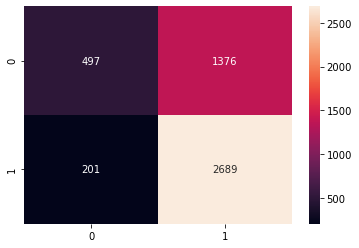

In [40]:
sns.heatmap(confusion_matrix(y_test, gs_preds), annot=True, fmt='g');

In [41]:
print(classification_report(y_test, gs_preds))

              precision    recall  f1-score   support

       False       0.71      0.27      0.39      1873
        True       0.66      0.93      0.77      2890

    accuracy                           0.67      4763
   macro avg       0.69      0.60      0.58      4763
weighted avg       0.68      0.67      0.62      4763



In [42]:
gs = GridSearchCV(rfc, rfc_params, scoring=metricas, 
                    refit='roc_auc', 
                    verbose=3)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END max_depth=5, n_estimators=50, random_state=42; accuracy: (test=0.615) f1: (test=0.758) roc_auc: (test=0.653) total time=   5.8s
[CV 2/5] END max_depth=5, n_estimators=50, random_state=42; accuracy: (test=0.622) f1: (test=0.762) roc_auc: (test=0.649) total time=   5.8s
[CV 3/5] END max_depth=5, n_estimators=50, random_state=42; accuracy: (test=0.619) f1: (test=0.761) roc_auc: (test=0.664) total time=   5.7s
[CV 4/5] END max_depth=5, n_estimators=50, random_state=42; accuracy: (test=0.618) f1: (test=0.760) roc_auc: (test=0.667) total time=   5.7s
[CV 5/5] END max_depth=5, n_estimators=50, random_state=42; accuracy: (test=0.620) f1: (test=0.761) roc_auc: (test=0.640) total time=   5.7s
[CV 1/5] END max_depth=5, n_estimators=100, random_state=42; accuracy: (test=0.613) f1: (test=0.758) roc_auc: (test=0.660) total time=  11.7s
[CV 2/5] END max_depth=5, n_estimators=100, random_state=42; accuracy: (test=0.621) f1: (tes

[CV 4/5] END max_depth=20, n_estimators=300, random_state=42; accuracy: (test=0.654) f1: (test=0.770) roc_auc: (test=0.686) total time= 1.7min
[CV 5/5] END max_depth=20, n_estimators=300, random_state=42; accuracy: (test=0.652) f1: (test=0.767) roc_auc: (test=0.667) total time= 1.7min
[CV 1/5] END max_depth=30, n_estimators=50, random_state=42; accuracy: (test=0.632) f1: (test=0.739) roc_auc: (test=0.644) total time=  19.3s
[CV 2/5] END max_depth=30, n_estimators=50, random_state=42; accuracy: (test=0.639) f1: (test=0.743) roc_auc: (test=0.648) total time=  18.3s
[CV 3/5] END max_depth=30, n_estimators=50, random_state=42; accuracy: (test=0.628) f1: (test=0.736) roc_auc: (test=0.643) total time=  18.6s
[CV 4/5] END max_depth=30, n_estimators=50, random_state=42; accuracy: (test=0.648) f1: (test=0.750) roc_auc: (test=0.653) total time=  18.8s
[CV 5/5] END max_depth=30, n_estimators=50, random_state=42; accuracy: (test=0.633) f1: (test=0.737) roc_auc: (test=0.644) total time=  18.8s
[CV 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 20, 30],
                         'n_estimators': [50, 100, 200, 300],
                         'random_state': [42]},
             refit='roc_auc', scoring=['roc_auc', 'f1', 'accuracy'], verbose=3)

In [43]:
melhor_modelo_arvore = gs.best_estimator_

In [44]:
melhor_modelo_arvore

RandomForestClassifier(max_depth=10, n_estimators=300, random_state=42)

In [45]:
melhor_modelo_arvore.score(X_test, y_test)

0.656938904052068

In [46]:
melhor_modelo_arvore.predict(X_test)[0]

True

In [47]:
# predict proba são o quanto o dado pertence a uma das classes - então para o primeiro dado
# há 0.99 de chance de pertecer a classe 0, e 0.005 de pertencer a classe 1
melhor_modelo_arvore.predict_proba(X_test)[0]

array([0.42528993, 0.57471007])

In [48]:
y_pred_mma = melhor_modelo_arvore.predict(X_test)

In [49]:
roc_auc_score(y_test, y_pred_mma)

0.5693439091663172

In [50]:
print(classification_report(y_test, y_pred_mma))

              precision    recall  f1-score   support

       False       0.83      0.16      0.27      1873
        True       0.64      0.98      0.78      2890

    accuracy                           0.66      4763
   macro avg       0.74      0.57      0.52      4763
weighted avg       0.72      0.66      0.58      4763



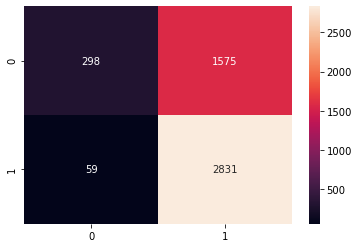

In [51]:
sns.heatmap(confusion_matrix(y_test, y_pred_mma), annot=True, fmt='g');